In [1]:
!pip install pandas

In [2]:
import pandas as pd

In [3]:
!pip install numpy

In [4]:
import numpy as np

In [5]:
!pip install matplotlib

In [6]:
import matplotlib as plt

In [7]:
!pip install seaborn

In [8]:
import seaborn as sns

In [9]:
url ="https://raw.githubusercontent.com/SR1608/Datasets/main/covid-data.csv"
df = pd.read_csv(url)

In [10]:
#check data 
print(df.head())

  iso_code continent     location      date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  31/12/19          NaN        0.0   
1      AFG      Asia  Afghanistan  01/01/20          NaN        0.0   
2      AFG      Asia  Afghanistan  02/01/20          NaN        0.0   
3      AFG      Asia  Afghanistan  03/01/20          NaN        0.0   
4      AFG      Asia  Afghanistan  04/01/20          NaN        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           NaN         0.0                  NaN  ...   
1                 NaN           NaN         0.0                  NaN  ...   
2                 NaN           NaN         0.0                  NaN  ...   
3                 NaN           NaN         0.0                  NaN  ...   
4                 NaN           NaN         0.0                  NaN  ...   

   gdp_per_capita  extreme_poverty  cardiovasc_death_rate  \
0        1803.987              NaN               

In [11]:
# a. Rows & columns
print(df.shape)

(57394, 49)


In [13]:
# b.data types
print(df.dtypes)

iso_code                               object
continent                              object
location                               object
date                                   object
total_cases                           float64
new_cases                             float64
new_cases_smoothed                    float64
total_deaths                          float64
new_deaths                            float64
new_deaths_smoothed                   float64
total_cases_per_million               float64
new_cases_per_million                 float64
new_cases_smoothed_per_million        float64
total_deaths_per_million              float64
new_deaths_per_million                float64
new_deaths_smoothed_per_million       float64
reproduction_rate                     float64
icu_patients                          float64
icu_patients_per_million              float64
hosp_patients                         float64
hosp_patients_per_million             float64
weekly_icu_admissions             

In [14]:
# c. Info & describe
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57394 entries, 0 to 57393
Data columns (total 49 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   iso_code                            57071 non-null  object 
 1   continent                           56748 non-null  object 
 2   location                            57394 non-null  object 
 3   date                                57394 non-null  object 
 4   total_cases                         53758 non-null  float64
 5   new_cases                           56465 non-null  float64
 6   new_cases_smoothed                  55652 non-null  float64
 7   total_deaths                        44368 non-null  float64
 8   new_deaths                          56465 non-null  float64
 9   new_deaths_smoothed                 55652 non-null  float64
 10  total_cases_per_million             53471 non-null  float64
 11  new_cases_per_million               56401

In [16]:
# a.Unique locations
print(df['location'].nunique())

216


In [17]:
# b.continent with max frequency
print(df['continent'].value_counts())

continent
Europe           14828
Africa           13637
Asia             13528
North America     9116
South America     3404
Oceania           2235
Name: count, dtype: int64


In [18]:
# c.Max & mean of total_cases
print(df['total_cases'].max())
print(df['total_cases'].mean())

55154651.0
167797.3688753302


In [19]:
# d.quartiles of total_deaths
print(df['total_deaths'].quantile([0.25,0.5,0.75]))

0.25     13.0
0.50     84.0
0.75    727.0
Name: total_deaths, dtype: float64


In [23]:
# e.continent with max HDI
print(df.groupby('continent')['human_development_index'].max())

continent
Africa           0.797
Asia             0.933
Europe           0.953
North America    0.926
Oceania          0.939
South America    0.843
Name: human_development_index, dtype: float64


In [24]:
# f.continent with min GDP per capita
print(df.groupby('continent')['gdp_per_capita'].min())

continent
Africa            661.240
Asia             1479.147
Europe           5189.972
North America    1653.173
Oceania          2205.923
South America    6885.829
Name: gdp_per_capita, dtype: float64


In [25]:
#keep only needed columns 
df = df[['continent','location','date','total_cases','total_deaths','gdp_per_capita','human_development_index']]

In [26]:
# a.Remove duplicates
df = df.drop_duplicates()

In [27]:
# b. Missing values
print(df.isnull().sum())

continent                    646
location                       0
date                           0
total_cases                 3636
total_deaths               13026
gdp_per_capita              7027
human_development_index     8147
dtype: int64


In [28]:
# c.Drop rows where continent is missing
df = df.dropna(subset=['continent'])

In [29]:
# d.fill remaining missing values with 0
df = df.fillna(0)

In [30]:
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month

C:\Users\dell\AppData\Local\Temp\ipykernel_12756\2374871002.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])


In [31]:
df_groupby = df.groupby('continent').max().reset_index()
print(df_groupby)

       continent                      location       date  total_cases  \
0         Africa                      Zimbabwe 2020-12-11     752269.0   
1           Asia                         Yemen 2020-12-11    8874290.0   
2         Europe                       Vatican 2020-12-11    1991233.0   
3  North America  United States Virgin Islands 2020-12-11   11205486.0   
4        Oceania             Wallis and Futuna 2020-12-11      27750.0   
5  South America                     Venezuela 2020-12-11    5876464.0   

   total_deaths  gdp_per_capita  human_development_index  month  
0       20314.0       26382.287                    0.797     12  
1      130519.0      116935.600                    0.933     12  
2       52147.0       94277.965                    0.953     12  
3      247220.0       54225.446                    0.926     12  
4         907.0       44648.710                    0.939     12  
5      166014.0       22767.037                    0.843     12  


In [32]:
df_groupby['total_deaths_to_total_cases'] = df_groupby['total_deaths'] / df_groupby['total_cases']

In [33]:
import matplotlib.pyplot as plt

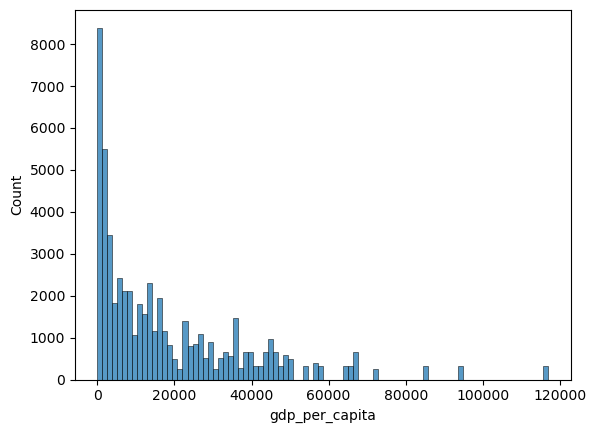

In [34]:
# a. histrogram of GDP per capita
sns.histplot(df['gdp_per_capita'])
plt.show()

<Axes: xlabel='gdp_per_capita', ylabel='total_cases'>

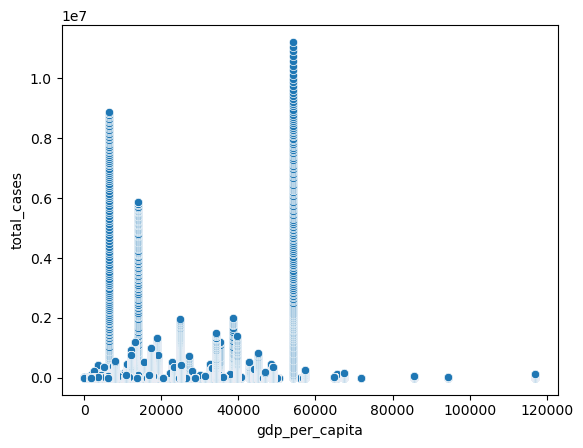

In [35]:
# b.scatter plot:total_cases vs gdp_per_capita
sns.scatterplot(x='gdp_per_capita', y='total_cases', data=df)

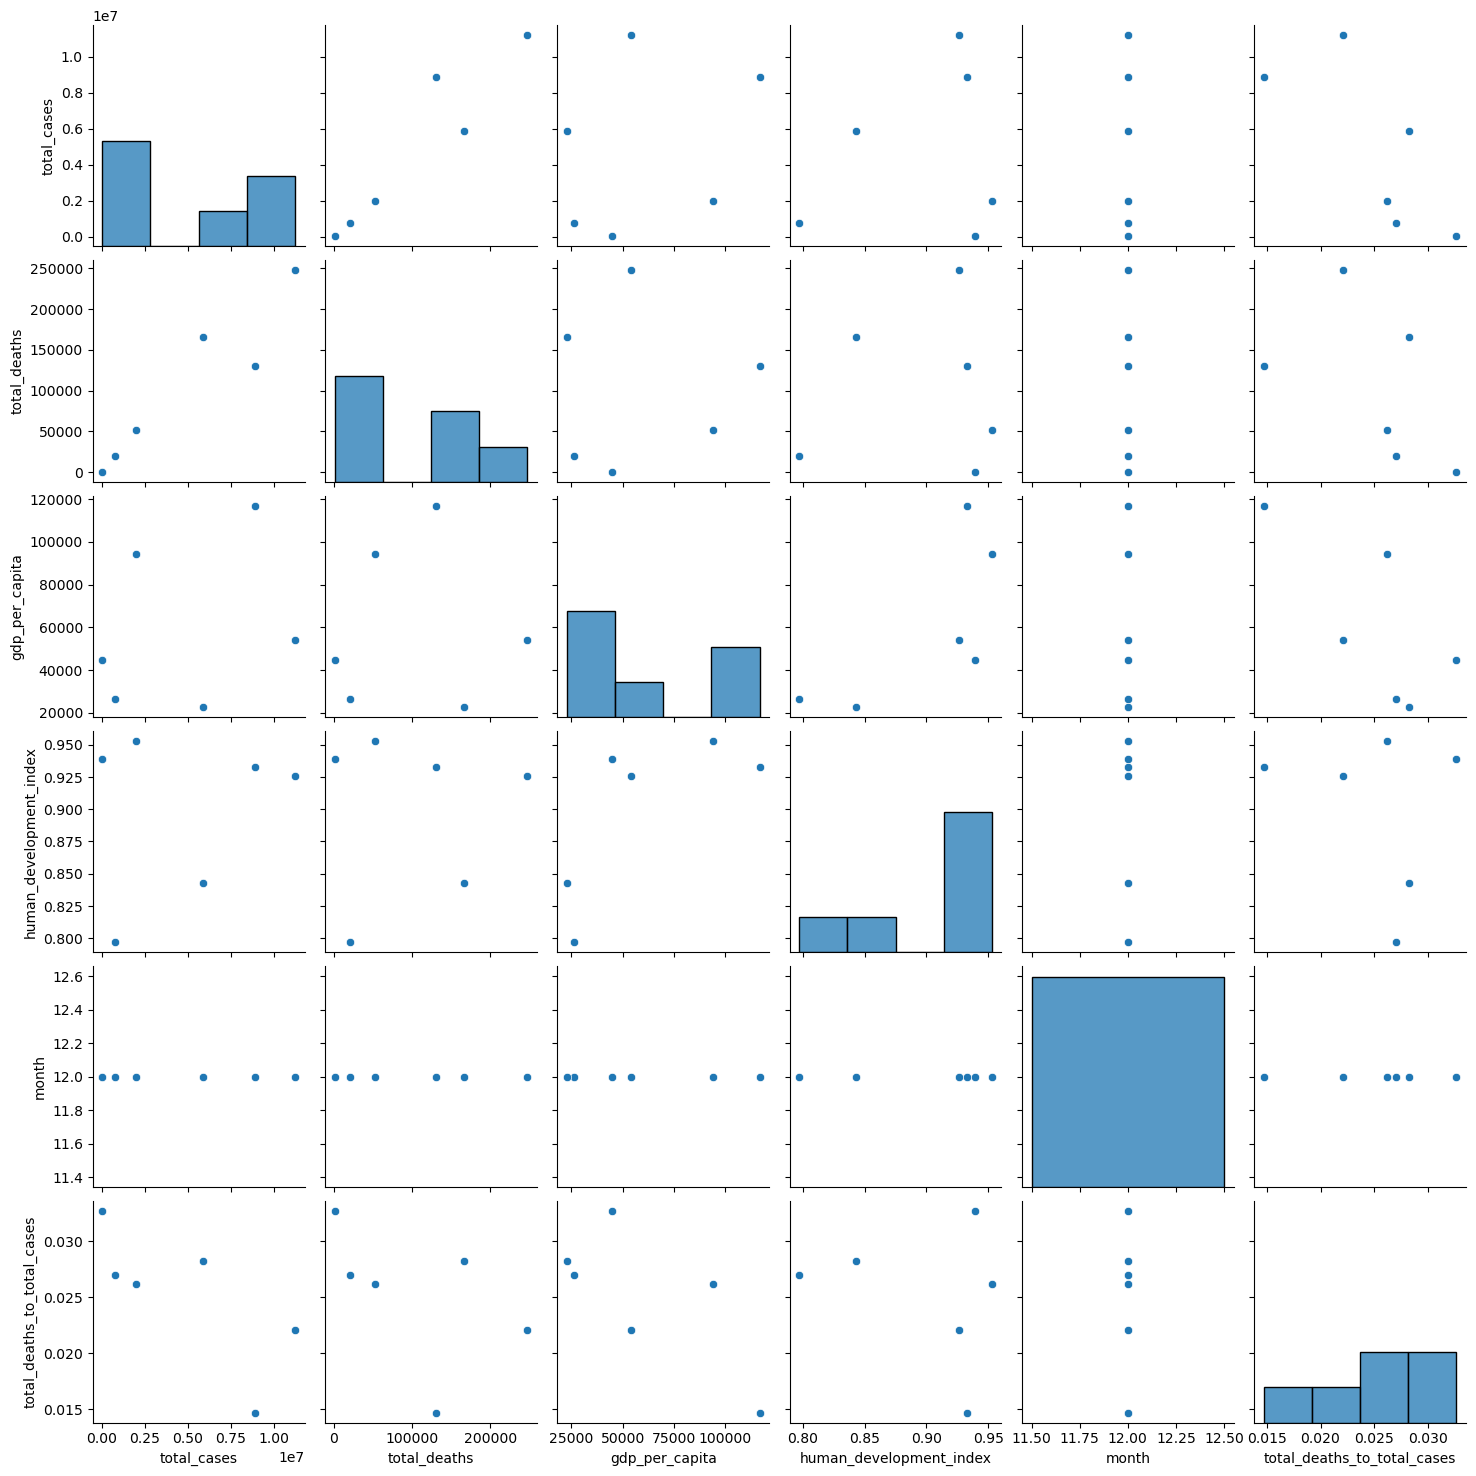

In [36]:
# c.pairplot on df_groupby
sns.pairplot(df_groupby)
plt.show()

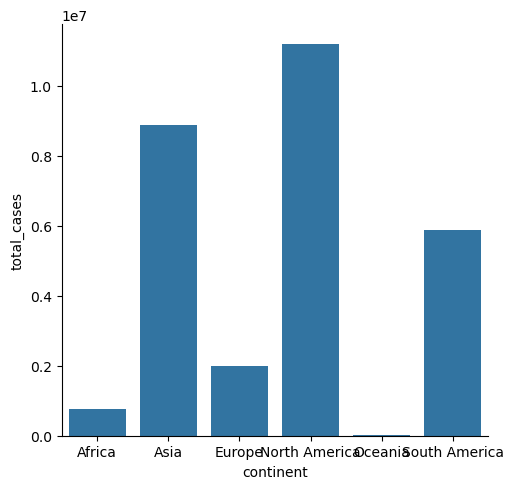

In [37]:
# d.bar plot of continent vs total_cases
sns.catplot(x='continent', y='total_cases', kind='bar', data=df_groupby)
plt.show()